In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import random
from sklearn import linear_model
from adjustText import adjust_text
# from __future__ import division

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline
seaborn.set()
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

G:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
G:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
G:\Anaconda3\lib\site

In [2]:
# 建立字典，对应政策代号及其中英文名
dic_policyEng = dict()
dic_policyChi = dict()

# 封闭措施
dic_policyEng['C1'] = 'School closing'
dic_policyChi['C1'] = '关闭学校'
dic_policyEng['C2'] = 'Workplace closing'
dic_policyChi['C2'] = '关闭工作场所'
dic_policyEng['C3'] = 'Cancel public events'
dic_policyChi['C3'] = '取消公共活动'
dic_policyEng['C4'] = 'Restrictions on gatherings'
dic_policyChi['C4'] = '限制集会'
dic_policyEng['C5'] = 'Close public transport'
dic_policyChi['C5'] = '关闭公共交通'
dic_policyEng['C6'] = 'Stay at home requirements'
dic_policyChi['C6'] = '居家要求'
dic_policyEng['C7'] = 'Restrictions on internal movement'
dic_policyChi['C7'] = '国内移动限制'
dic_policyEng['C8'] = 'International travel controls'
dic_policyChi['C8'] = '国际旅行控制'

# 经济政策
dic_policyEng['E1'] = 'Income support'
dic_policyChi['E1'] = '收入支持'
dic_policyEng['E2'] = 'Debt/contract relief'
dic_policyChi['E2'] = '债务或合同放宽'
dic_policyEng['E3'] = 'Fiscal measures'
dic_policyChi['E3'] = '财政措施'
dic_policyEng['E4'] = 'International support'
dic_policyChi['E4'] = '给予国际支持'

# 卫生系统政策
dic_policyEng['H1'] = 'Public information campaigns'
dic_policyChi['H1'] = '公共信息宣传'
dic_policyEng['H2'] = 'Testing policy'
dic_policyChi['H2'] = '检测政策'
dic_policyEng['H3'] = 'Contact tracing'
dic_policyChi['H3'] = '接触者追踪'
dic_policyEng['H4'] = 'Emergency investment in healthcare'
dic_policyChi['H4'] = '医疗保健紧急投资'
dic_policyEng['H5'] = 'Investment in vaccines'
dic_policyChi['H5'] = '疫苗投资'
dic_policyEng['H6'] = 'Facial Coverings'
dic_policyChi['H6'] = '口罩政策'
dic_policyEng['H7'] = 'Vaccination Policy'
dic_policyChi['H7'] = '疫苗接种政策'

ls_code = list(dic_policyEng.keys())
for code in ['E3','E4','H4','H5','H7']:
    ls_code.remove(code)
ls_code

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'E1',
 'E2',
 'H1',
 'H2',
 'H3',
 'H6']

In [3]:
ls_data = dict()
for code in ls_code:
    string1 = '{}\\{}_Introduce.csv'.format(code,code)
    string2 = '{}\\{}_Lift.csv'.format(code,code)
    string3 = '{}\\{}_NoSuchPolicy.csv'.format(code,code)
    f_intro = open(string1,encoding='utf-8')
    data_intro = pd.read_csv(f_intro)
    f_lift = open(string2,encoding='utf-8')
    data_lift = pd.read_csv(f_lift)
    f_nop = open(string3,encoding='utf-8')
    data_nop = pd.read_csv(f_nop)
    key1 = code+'Introduce'
    key2 = code+'Lift'
    key3 = code+'NoSuchPolicy'
    ls_data[key1] = data_intro
    ls_data[key2] = data_lift
    ls_data[key3] = data_nop

G:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


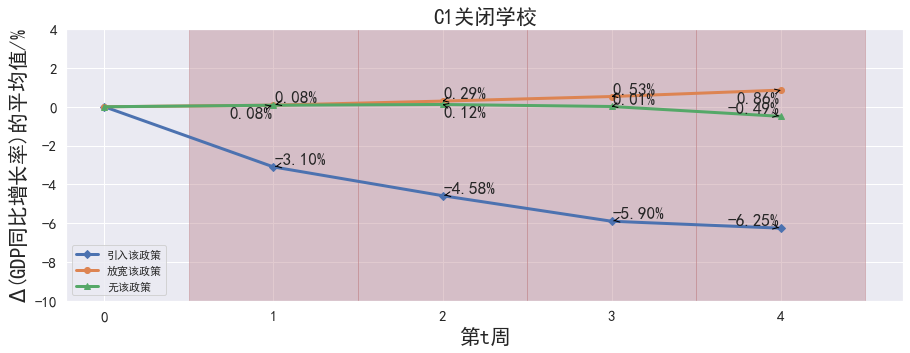

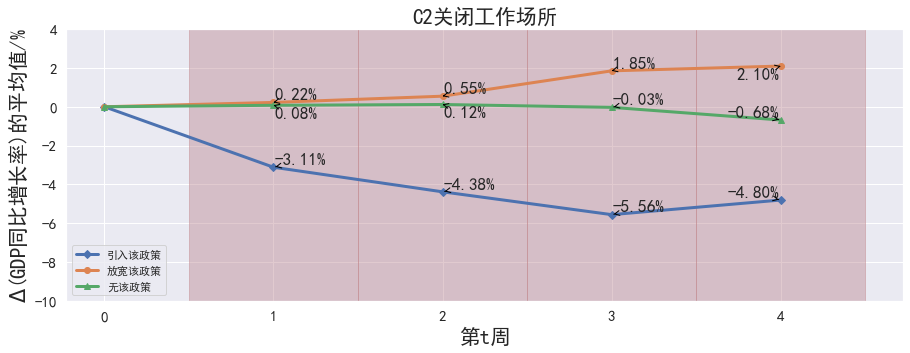

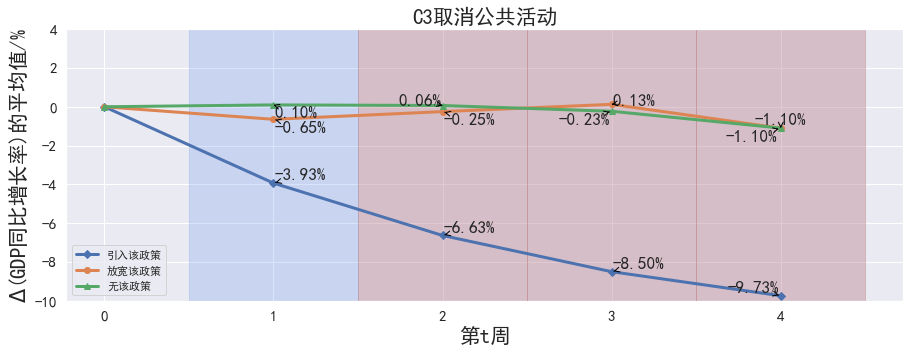

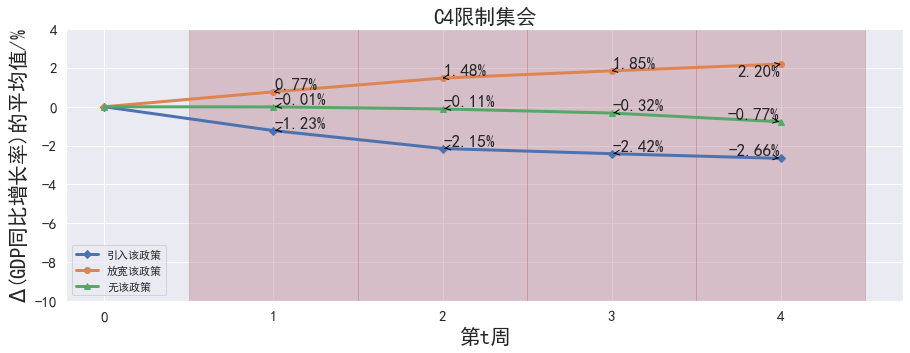

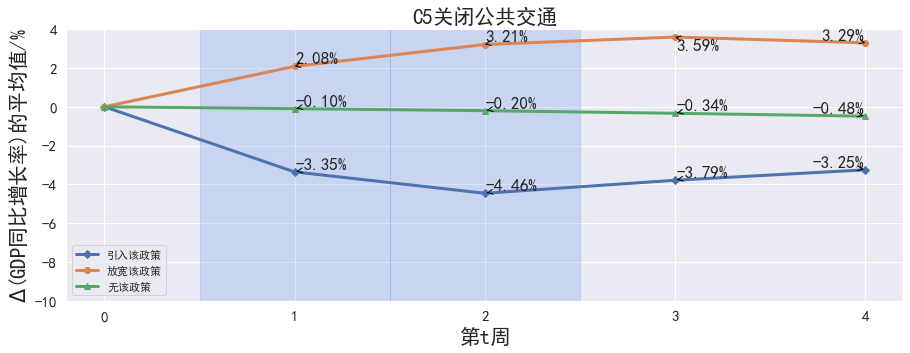

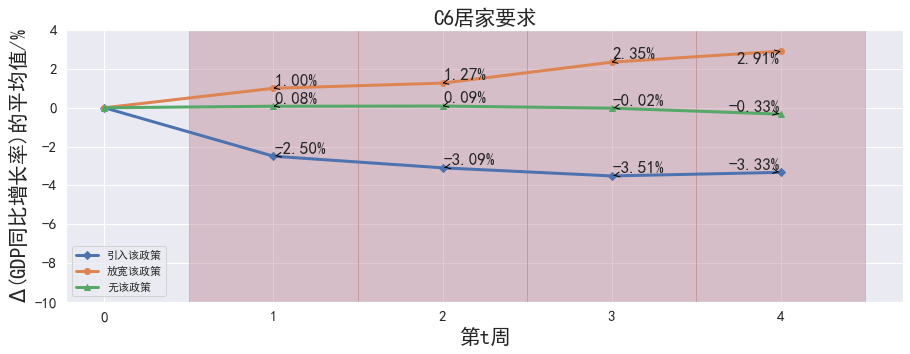

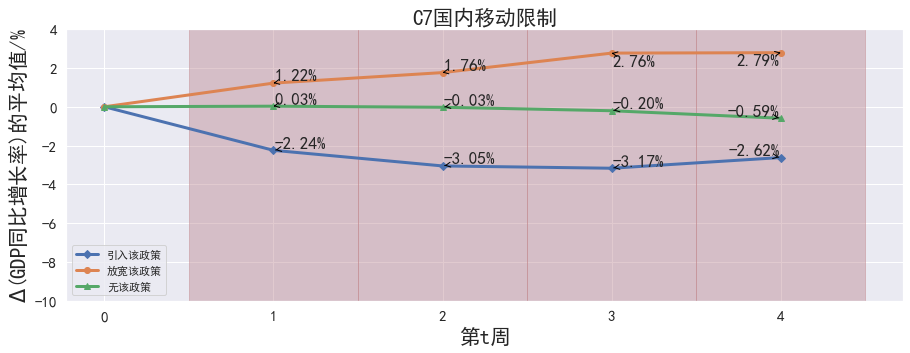

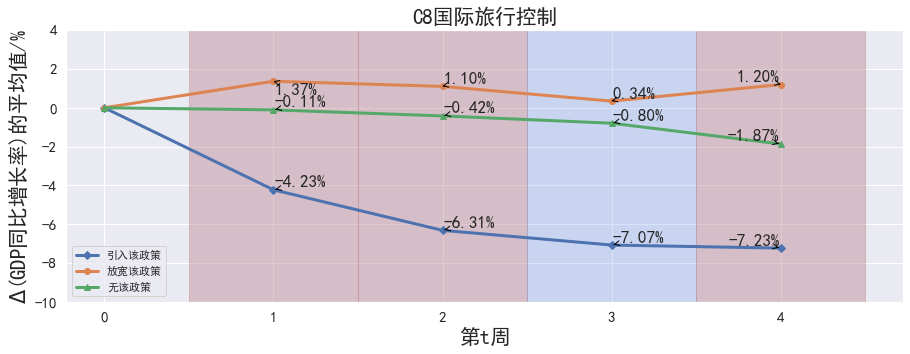

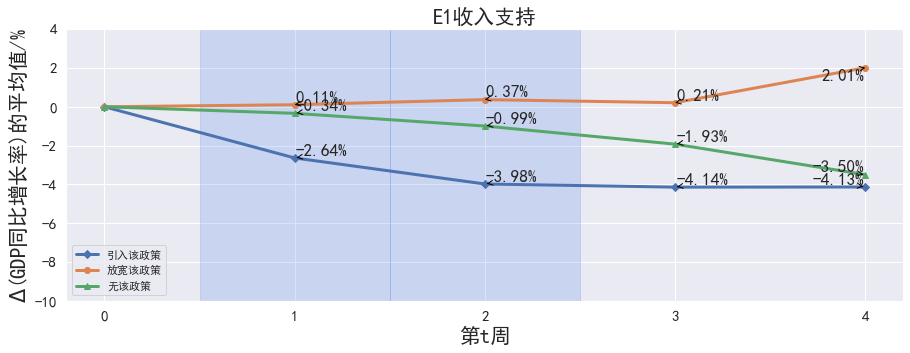

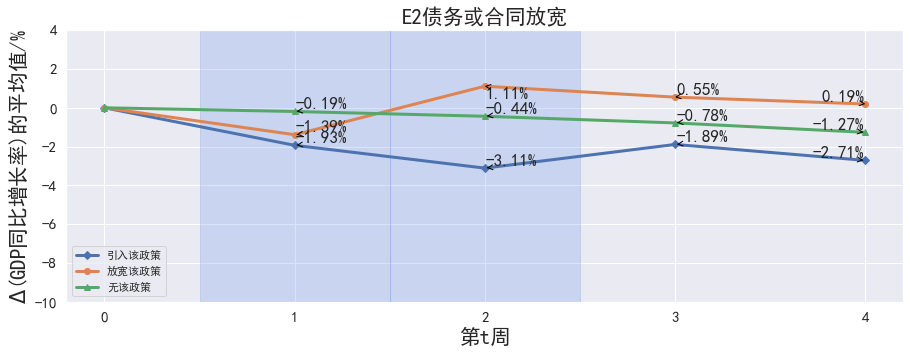

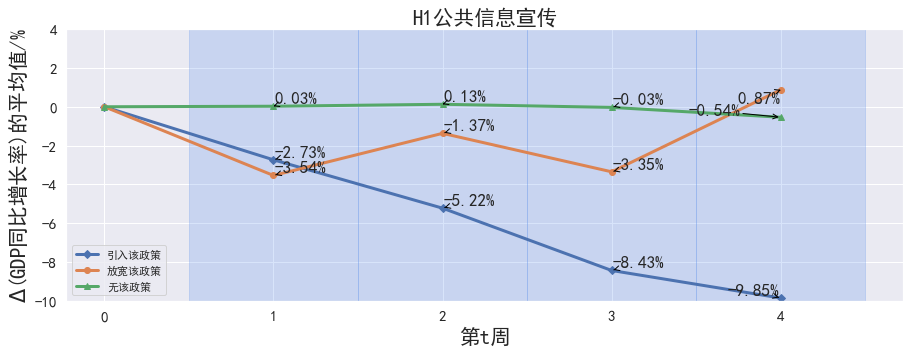

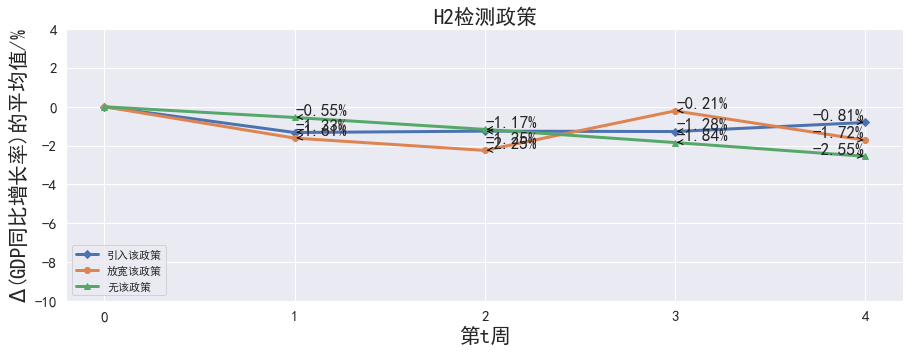

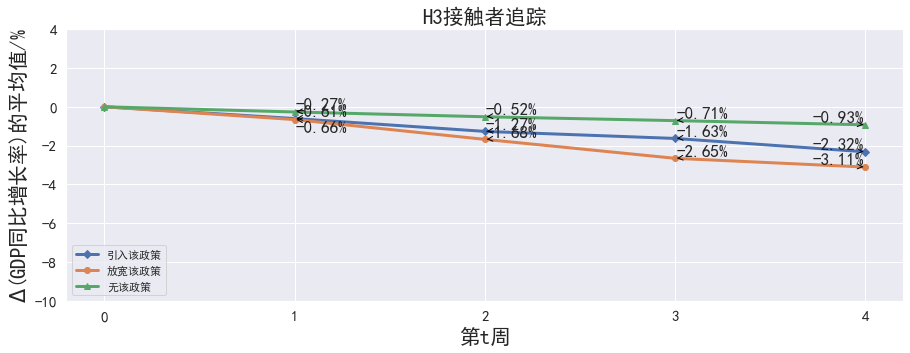

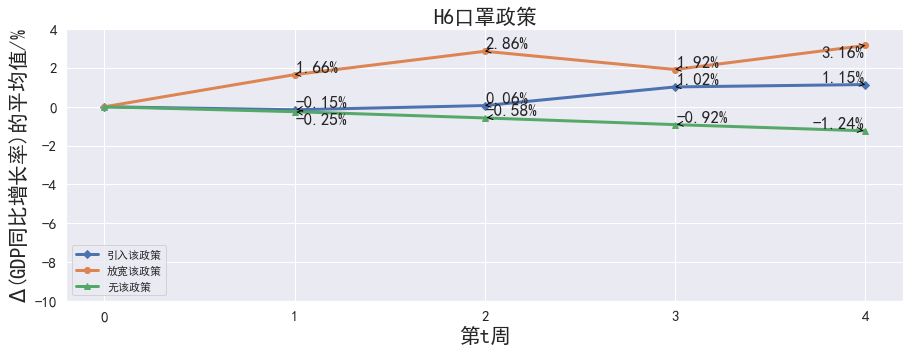

In [4]:
for code in ls_code:
    data_plot = pd.DataFrame()
    data_plot['Introduce'] = pd.Series(np.zeros(5))
    data_plot['Lift'] = pd.Series(np.zeros(5))
    data_plot['NoSuchPolicy'] = pd.Series(np.zeros(5))
    conditions = ['Introduce','Lift','NoSuchPolicy']
    for condition in conditions:
        for i in range(1,5):
            data = ls_data[code+condition]
            delta_GDP_Growth_mean = data['W{}_delta_GDP_Growth'.format(i)].mean()
            data_plot[condition].iloc[i] = delta_GDP_Growth_mean
    plt.figure(figsize=(15,5))
    plt.plot(data_plot['Introduce'],linewidth=3,marker='D')
    plt.plot(data_plot['Lift'],linewidth=3,marker='o')
    plt.plot(data_plot['NoSuchPolicy'],linewidth=3,marker='^')
    # 标记变化值
    texts = []
    for i in range(1,5):
        texts.append(plt.text(i,data_plot['Introduce'].iloc[i],'{:.2f}%'.format(data_plot['Introduce'].iloc[i]),fontsize='x-large',verticalalignment='top',horizontalalignment='center'))
        texts.append(plt.text(i,data_plot['Lift'].iloc[i],'{:.2f}%'.format(data_plot['Lift'].iloc[i]),fontsize='x-large',verticalalignment='top',horizontalalignment='center'))
        texts.append(plt.text(i,data_plot['NoSuchPolicy'].iloc[i],'{:.2f}%'.format(data_plot['NoSuchPolicy'].iloc[i]),fontsize='x-large',verticalalignment='top',horizontalalignment='center'))
    adjust_text(texts,arrowprops=dict(arrowstyle='->',lw= 1,color='black'),precision=0.005)
    # data_plot.plot(figsize=(15,5),linewidth=3)
    plt.xticks(range(5))
    plt.tick_params(labelsize=15)
    plt.xlabel('第t周',fontsize='xx-large')
    plt.ylabel('$\Delta$(GDP同比增长率)的平均值/%',fontsize='xx-large')
    plt.title(code+dic_policyChi[code],fontsize='xx-large')
    plt.ylim(-10,4)
    
    # 绘制通过检验的区间

    for i in range(4):
        data_test = pd.DataFrame()
        data_test['NoSuchPolicy'] = ls_data[code+'NoSuchPolicy']['W{}_delta_GDP_Growth'.format(i+1)].reset_index(drop=True)
        data_test['Introduce'] = ls_data[code+'Introduce']['W{}_delta_GDP_Growth'.format(i+1)].reset_index(drop=True)
        data_test['Lift'] = ls_data[code+'Lift']['W{}_delta_GDP_Growth'.format(i+1)].reset_index(drop=True)
        
        data_test_melt = data_test.melt()
        data_test_melt.columns = ['Treat','Value']

        model = ols('Value~C(Treat)',data=data_test_melt).fit()
        anova_table = anova_lm(model, typ = 2)
        if anova_table['PR(>F)'].iloc[0] < 0.01:
            plt.fill_between([i+0.5,i+1.5],-10,4,color='cornflowerblue', alpha=.25)
        
        data_test1 = pd.DataFrame()
        data_test1['Introduce'] = ls_data[code+'Introduce']['W{}_delta_GDP_Growth'.format(i+1)].reset_index(drop=True)
        data_test1['Lift'] = ls_data[code+'Lift']['W{}_delta_GDP_Growth'.format(i+1)].reset_index(drop=True)
        
        data_test_melt1 = data_test1.melt()
        data_test_melt1.columns = ['Treat','Value']

        model = ols('Value~C(Treat)',data=data_test_melt1).fit()
        anova_table = anova_lm(model, typ = 2)
        if anova_table['PR(>F)'].iloc[0] < 0.01:
            plt.fill_between([i+0.5,i+1.5],-10,4,color='coral', alpha=.25)

    plt.legend(['引入该政策','放宽该政策','无该政策'],loc='lower left')
    plt.savefig('GDP与政策关系图像\\'+code+dic_policyChi[code]+'.png')